# Bike Sharing

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

_You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market._

In [86]:
# Import the necessary libraries
import matplotlib.pyplot as plt, numpy as np, pandas as pd, seaborn as sns
from sklearn.metrics import r2_score

## 1. Data Understanding, Preparation and EDA

### Data Dictionary

Adding the data dictionary here for easier reference

```
=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
```

Looking at the data dictionary, a few things right off the bat 
1. The categorical variables in the dataset are 
    - `season` 
    - `holiday` (binary categorical)
    - `weekday`
    - `workingday` (binary categorical)
    - `weathersit`
2. `cnt` is the target variable (from the problem statement)
3. possible colinear variables
    - `cnt` is just a sum of `registered` and `casual` and hence it's likely colinear
       

### Load dataset

In [87]:
bikeshare_data = pd.read_csv('./day.csv')

In [88]:
bikeshare_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1a. Data Quality Checks

#### Checking for null values

In [89]:
bikeshare_data.shape

(730, 16)

In [90]:
bikeshare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the info output, it can be seen that all the columns have 730 values and hence there are no null values in the dataset.

#### Data bounds check

In [91]:
bikeshare_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Observing the range of each column (i,e min and max value) there doesn't seem to be any values that deviate from the data dictionary description.

### 1b. EDA

In [104]:
# Select only numerical columns
eda_df = pd.concat([bikeshare_data.select_dtypes(['float']), bikeshare_data['cnt']], axis='columns')

eda_df.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


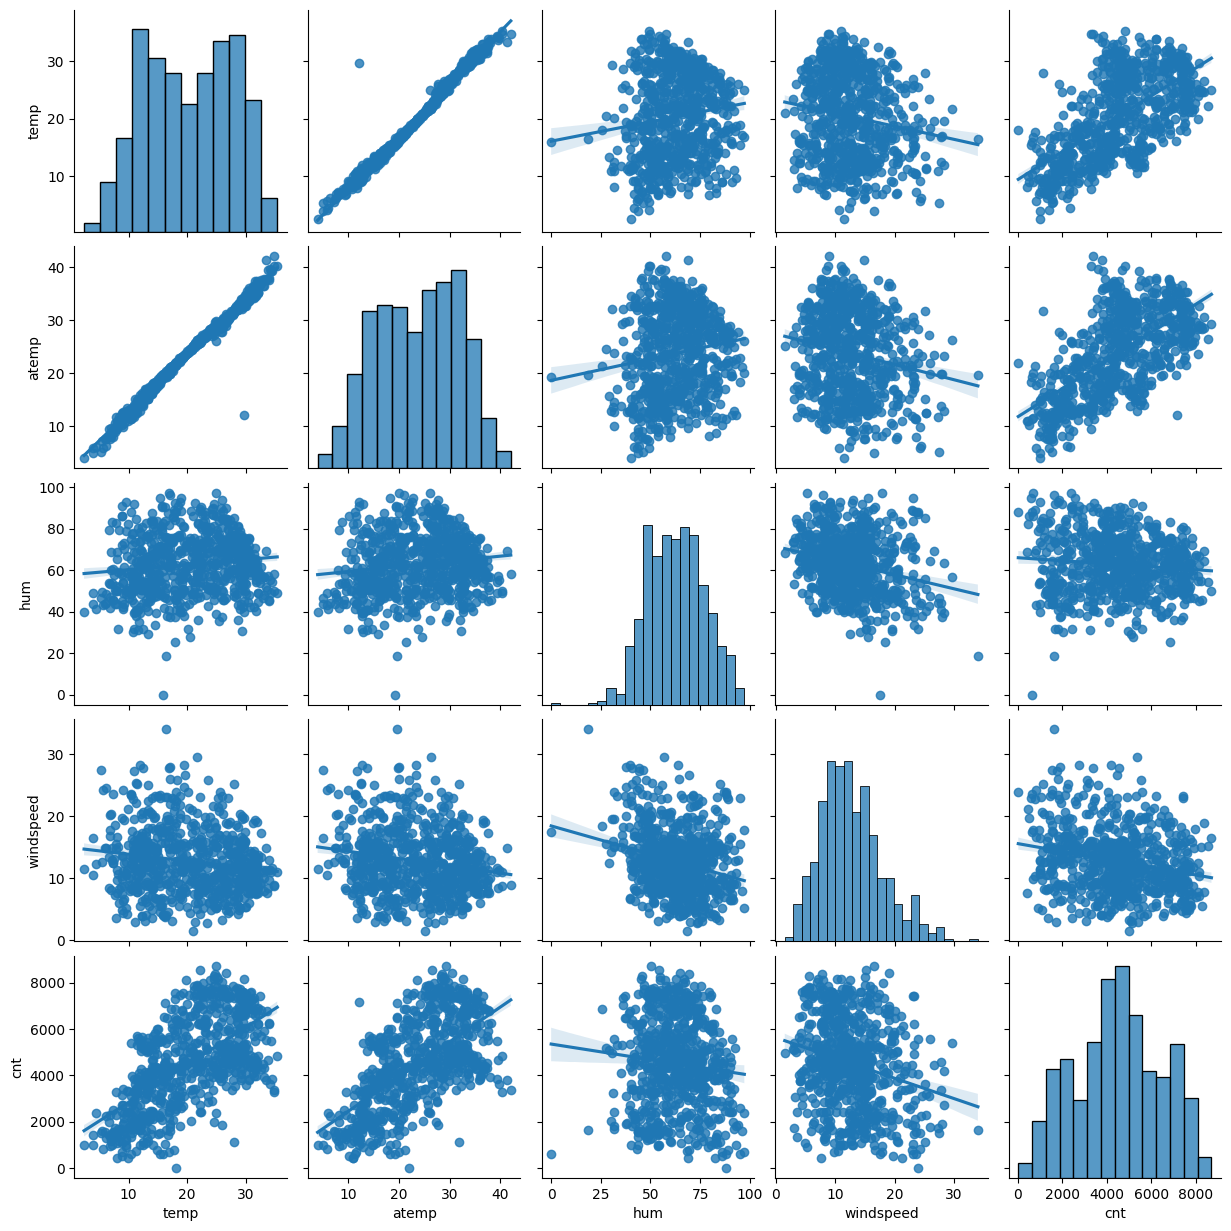

In [105]:
sns.pairplot(data=eda_df, kind='reg')
plt.show()

### 1c. Handling Categorical variables

The following are the categorical variables in the dataset
1. holiday (binary categorical)
2. workingday (binary categorical)
3. season
4. weekday
5. weathersit

#### Binary Categorical variables

In [ ]:
bikeshare_data[['holiday', 'workingday']].describe()

Since the values are already numerical, there is nothing else to be done for these binary categorical values

#### Non binary categorical variables

In [ ]:
bikeshare_data[['season', 'weekday', 'weathersit']].describe()

As per the data dictionary, the values for season map to the following categories

- 1:spring, 
- 2:summer, 
- 3:fall, 
- 4:winter

In [ ]:
# Modify the dataframe to convert numerical values in the seasons column to their respective string labels
season_mapping = ['spring', 'summer', 'fall', 'winter']
bikeshare_data.season = bikeshare_data.season.apply(lambda x: season_mapping[x-1])

In [ ]:
# Modify the dataframe to convert the weekday numerical values to the name of the weekday
# In the data dictionary it's not specified as which day of the week is represented by which number, but it can be 
# inferred using the date from the dteday column 
weekdays = ['tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'monday']
bikeshare_data.weekday = bikeshare_data.weekday.apply(lambda x: weekdays[x])

In [ ]:
weather_categories = ['partly_cloudy', 'mist', 'light_snow', 'heavy_rain']
bikeshare_data.weathersit = bikeshare_data.weathersit.apply(lambda x: weather_categories[x])

In [ ]:
bikeshare_data.weathersit.value_counts()

In [ ]:
# Verify that labels are properly set for the appropriate columns
bikeshare_data.head(5)

#### Encoding non binary categorical values

In [ ]:
dummies_season = pd.get_dummies(bikeshare_data.season, dtype='int', drop_first=True, prefix='season')
dummies_season

In [ ]:
dummies_weekday = pd.get_dummies(bikeshare_data.weekday, dtype='int', drop_first=True, prefix='weekday')
dummies_weekday

In [ ]:
dummies_weathersit = pd.get_dummies(bikeshare_data.weathersit, dtype='int', drop_first=True, prefix='weathersit')
dummies_weathersit

In [ ]:
# Add all the dummy columns created in the previous steps to the main dataset
bikeshare_data = pd.concat([bikeshare_data, dummies_season, dummies_weathersit, dummies_weekday], axis='columns')

In [ ]:
# Drop the columns for which dummy values are added
bikeshare_data = bikeshare_data.drop(columns=['weathersit', 'season', 'weekday'], axis='columns')

In [ ]:
bikeshare_data.sample(5) 

In [ ]:
date_time_index = pd.DatetimeIndex(bikeshare_data.dteday, dayfirst=True)

In [ ]:
bikeshare_data['day_of_month'] = date_time_index.day

In [ ]:
bikeshare_data.head()

In [ ]:
# Drop the dteday column since a combination of yr, mnth and day_of_month together can represent the same 
bikeshare_data = bikeshare_data.drop('dteday', axis='columns')

In [ ]:
# All the columns are now numeric
bikeshare_data.info()

#### Remove irrelevant columns

In [ ]:
# Utility method for plotting heatmap
def plot_heatmap(dataframe):
    plt.figure(figsize=(15, 12))
    sns.heatmap(dataframe.corr().round(2), annot=True, cmap='RdYlGn')
    plt.show()

In [ ]:
# drop the 'instant' column as it's just an artificial identifier and hence irrelevant to our analysis
bikeshare_data = bikeshare_data.drop('instant', axis='columns')

Let's look at the heatmap to better understand which independed variables are highly correlated

In [ ]:
plot_heatmap(bikeshare_data)

> As can be seen in the heatmap above, `registered` and `casual` are strongly correlated with `cnt` but we know that `cnt = registered + casual`. <font color="brown">__We can safely drop the `registered` and `casual` columns.__</font>

In [ ]:
# Ad-hoc Check to verify that cnt = registered + casual is true for all entries
np.where(bikeshare_data.cnt != bikeshare_data.registered + bikeshare_data.casual)

From the check above it's clear that it's true for all entries that cnt = registered + casual 

In [ ]:
# Drop registered and casual columns from the master dataframe
bikeshare_data = bikeshare_data.drop(['registered', 'casual'], axis='columns')

> `temp` and `atemp` are very strongly correlated (0.99), which makes sense <font color="brown">__since the "feels like" temperature is actually calculated using wind speed, humidity and the actual temperature, hence `atemp` can also be dropped.__</font>

In [ ]:
bikeshare_data = bikeshare_data.drop(['atemp'], axis='columns')

In [ ]:
# Let's look at the heatmap now that some of the obvious columns have been dropped
plot_heatmap(bikeshare_data)

In [ ]:
bikeshare_data

### Creating the train / test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(bikeshare_data, train_size=0.7, random_state=100)

In [ ]:
print('Shape of Train data =', df_train.shape)
print('Shape of Test data =', df_test.shape)

### Rescaling features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# yr is not included here because it's already in the range 0,1 
columns_to_be_scaled = ['mnth', 'temp', 'hum', 'windspeed', 'cnt', 'day_of_month']

In [ ]:
df_train[columns_to_be_scaled] = scaler.fit_transform(df_train[columns_to_be_scaled])

# Performing only a transform on the test dataset since we don't want any data leakage 
df_test[columns_to_be_scaled] = scaler.transform(df_test[columns_to_be_scaled])

In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

---

## 2. Model Building and Evaluation

### 2a. Training the model

In [ ]:
# plot heatmap to see how the target variable cnt is correlated with the independent variables
plot_heatmap(df_train)

In [ ]:
# Indpendent variables
X_train = df_train.drop(['cnt'], axis='columns')

# Target / Dependent variable
y_train = df_train.cnt

In [ ]:
import statsmodels.api as sm

In [ ]:
# Helper function to create a linear regression model using statsmodels OLS
def fit_lr_model(x_train, y_train):
    x_train_sm = sm.add_constant(x_train) # Add intercept
    lr_obj = sm.OLS(y_train, x_train_sm)
    return lr_obj.fit()

### Feature Elimination

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Helper method for calculating variance inflation factor of all the predictors / variables in the given dataframe
def calculate_vif(train_df):
    vif_df = pd.DataFrame({"Variables": train_df.columns})
    vif_df['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
    return vif_df.sort_values(by=['VIF'], ascending=False)

In [ ]:
calculate_vif(X_train)

In [ ]:
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

Some of the predictors have very high variance inflation factor and hence they need to be dropped one by one

#### Drop `mnth` since it has high p value, low VIF (p = 0.56, VIF = 3.90)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns = ['mnth']

# Drop the mnth column as it has very high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping mnth
calculate_vif(X_train)

In [ ]:
# Look at the model summary with mnth dropped 
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `weekday_sunday` since it has high p value and low VIF (p = 0.85, VIF = 1.60)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_sunday')

# Drop the weekday_sunday column as it has high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_sunday
calculate_vif(X_train)

In [ ]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `weekday_saturday` since it has high p value and low VIF (p = 0.65, VIF = 1.28)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_saturday')

# Drop the weekday_saturday column as it has very high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_saturday
calculate_vif(X_train)

In [ ]:
# Look at the model summary again now that a column has been dropped 
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `day_of_month` since it has high p value and low VIF (p = 0.49, VIF = 1.02)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('day_of_month')

# Drop the day_of_month column as it has very high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping day_of_month
calculate_vif(X_train)

In [ ]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `weekday_tuesday` since it has high p value and high VIF (p = 0.25, VIF = 21.15)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_tuesday')

# Drop the weekday_tuesday column as it has high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_tuesday
calculate_vif(X_train)

In [ ]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `weekday_thursday` since it has high p value and low VIF (p = 0.25, VIF = 1.32)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_thursday')

# Drop the weekday_thursday column as it has low signifance (high p-value) and low VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_thursday
calculate_vif(X_train)

In [ ]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `weekday_wednesday` since it has high p value and low VIF (p = 0.24, VIF = 1.38)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_wednesday')

# Drop the weekday_wednesday column as it has low significance (high p-value), low VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_wednesday
calculate_vif(X_train)

In [ ]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `holiday` since it has high p value and low VIF (p = 0.11, VIF = 1.18)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('holiday')

# Drop the holiday column as it has low signifiance (high p-value) and low VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping holiday
calculate_vif(X_train)

In [ ]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `hum` since it has low p value and high VIF (p = 0.001, VIF = 24.09)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('hum')

# Drop the hum column as it has low significance (high p-value), high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping hum
calculate_vif(X_train)

In [ ]:
# Look at the model summary with hum dropped 
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

#### Drop `weathersit_mist` since it has low p value and high VIF (p = 0.00, VIF = 14.14)

In [ ]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weathersit_mist')

# Drop the weathersit_mist column as it has high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weathersit_mist
calculate_vif(X_train)

In [ ]:
# Look at the model summary with weathersit_mist dropped 
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

---

These 10 columns have been dropped recursively in the following order

1. High p-value, high VIF
2. High p-value, low VIF,
3. Low p-value, high VIF

In [ ]:
print('Dropped columns: ', dropped_columns)

# Residual Analysis

In [ ]:
# Compute the predicted values for the training set
X_train_sm = sm.add_constant(X_train)
y_train_pred = sm_lr_model.predict(X_train_sm)
residuals = y_train - y_train_pred

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Residual distribution: Training Set Predictions')
sns.histplot(data=residuals, kde=True, color='red')
plt.xlabel('Residual value')
plt.show()

> From the residual distribution above, it can be noted that it's more or less __normally distributed__ with most of the residual terms peaking at 0.

## Test Set Predictions

#### Transform test set

The test set has been scaled but is missing some other transformations that were made on the training set (Dropped columns, etc.)

In [ ]:
X_train

In [ ]:
df_test

In [ ]:
X_test = df_test[X_train.columns]
X_test_sm = sm.add_constant(X_test)

y_test = df_test['cnt']
y_test_pred = sm_lr_model.predict(X_test_sm)
redisuals_test = y_test - y_test_pred

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Residual distribution: Test Set Predictions')
sns.histplot(data=redisuals_test, kde=True, color='red')
plt.xlabel('Residual value')
plt.show()

## $R^{2}$ Analysis

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Evaluate R2
r2_train_set = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_test_set = r2_score(y_true=y_test, y_pred=y_test_pred)

print('R^2 for training set = ', round(r2_train_set, 2))
print('R^2 for test set     = ', round(r2_test_set, 2))

As calculated above, the $R^2$ values are pretty close for both the training and test sets which indicates that the model is able to generalize what is has learned on the test set. 

---

# Conclusion

### Model Interpretation

<div class="alert alert-info">

Looking at the coefficients below, it can be stated that 

1. `temp` has a strong positive correlation with `cnt`.
2. Followed by `yr`. This makes sense because as time goes by, bike sharing also increases in usage
3. Windspeed is negatively associated, which makes sense logically since higher windspeeds might discourage bike usage in general.
4. Snowy conditions are negatively associated, which also makes sense logically as bike accidents are more likley to in snowy conditions.
</div>

In [ ]:
sm_lr_model.summary()

---